## Portfolio Part 3

In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the rating column has been changed with like or dislike values. Your task is to train classification models to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item| rating | helpfulness | gender | category |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __timestamp__ - the timestamp indicating when the user rated the shopping item
* __review__ - the user's review comments of the item
* __item__ - the name of the item
* __rating__ - the user like or dislike the item
* __helpfulness__ - average rating from other users on whether the review comment is helpful. 6-helpful, 0-not helpful. 
* __gender__ - the gender of the user, F- female, M-male
* __category__ - the category of the shopping item


Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the __rating__ field in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Portfolio 3.csv')
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [3]:
df.describe()

,userId,timestamp,helpfulness
count,2899.000000,2899.000000,2899.000000
mean,5430.148672,56403.285271,3.875474
std,3460.227028,37664.826368,0.330237
min,46.000000,10100.000000,3.000000
25%,1676.000000,20500.000000,4.000000
50%,5985.000000,52101.000000,4.000000
75%,8626.000000,82500.000000,4.000000
max,10815.000000,123199.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   object
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.3+ KB


In [5]:
df.isna().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
dtype: int64

In [6]:
df =  df.dropna()

In [7]:
type_df = df.select_dtypes(include = ['object', 'float64', 'int64']).copy()

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(dtype=int)

type_df["category_code"] = ord_enc.fit_transform(type_df[["category"]])
type_df["gender_code"] = ord_enc.fit_transform(type_df[["gender"]])
type_df["review_code"] = ord_enc.fit_transform(type_df[["review"]])
type_df["item_code"] = ord_enc.fit_transform(type_df[["item"]])
type_df["rating_code"] = ord_enc.fit_transform(type_df[["rating"]])

type_df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category,category_code,gender_code,review_code,item_code,rating_code
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services,6,0,856,43,1
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies,5,0,1985,62,1
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies,5,0,2006,9,1
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies,5,0,472,77,1
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies,5,0,493,68,0
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel,2,0,599,47,1
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services,6,0,1232,23,1
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies,5,0,2415,12,0
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel,2,0,136,47,1
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies,5,0,692,11,1


In [9]:
# Dropping all non-relevant columns
digit_df = type_df.drop(columns=['timestamp','review','item','rating','gender','category'])
digit_df.head(10)

,userId,helpfulness,category_code,gender_code,review_code,item_code,rating_code
0,4259,4,6,0,856,43,1
1,4259,4,5,0,1985,62,1
2,4259,4,5,0,2006,9,1
3,4259,3,5,0,472,77,1
4,4259,4,5,0,493,68,0
5,4259,4,2,0,599,47,1
6,4259,3,6,0,1232,23,1
7,4259,4,5,0,2415,12,0
8,4259,4,2,0,136,47,1
9,4259,4,5,0,692,11,1


In [10]:
digit_df.userId.nunique()

289

In [11]:
digit_df.describe()

,userId,helpfulness,category_code,gender_code,review_code,item_code,rating_code
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,5430.148672,3.875474,5.037944,0.429113,1428.297344,41.691963,0.637806
std,3460.227028,0.330237,1.667270,0.495035,825.408633,25.415579,0.480717
min,46.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1676.000000,4.000000,5.000000,0.000000,718.500000,21.000000,0.000000
50%,5985.000000,4.000000,5.000000,0.000000,1424.000000,41.000000,1.000000
75%,8626.000000,4.000000,6.000000,1.000000,2145.500000,63.000000,1.000000
max,10815.000000,4.000000,8.000000,1.000000,2861.000000,85.000000,1.000000


In [12]:
#Correlation after dropping values and transforming data to numerical

corr_helpfulness = digit_df['helpfulness'].corr(digit_df['rating_code']) 
corr_category = digit_df['category_code'].corr(digit_df['rating_code'])
corr_gender = digit_df['gender_code'].corr(digit_df['rating_code'])
corr_review = digit_df['review_code'].corr(digit_df['rating_code'])
corr_item = digit_df['item_code'].corr(digit_df['rating_code'])

print('corr_helpfulness: ', corr_helpfulness)
print('corr_category: ', corr_category)
print('corr_gender: ', corr_gender)
print('corr_review: ', corr_review)
print('corr_item: ', corr_item)

#Separate df for a graph of corrrelations
Features = 'helpfulness','category','gender','review','item'
Corr = corr_helpfulness, corr_category, corr_gender, corr_review, corr_item 

corr_helpfulness:  -0.016849946909555234
corr_category:  -0.11631209500485055
corr_gender:  0.022575696214408653
corr_review:  -0.04693464358644689
corr_item:  0.013628997625434909


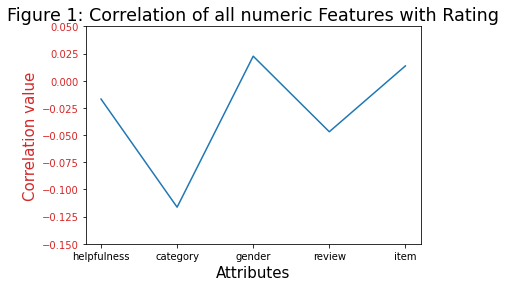

In [13]:
#Plot for correlation of numeric features
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_title('Figure 1: Correlation of all numeric Features with Rating',fontsize = 17.5)
ax1.set_xlabel('Attributes',fontsize=15)
ax1.set_ylabel('Correlation value', color=color,fontsize=15)
ax1.plot(Features,Corr)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-0.15, 0.05])
plt.show()

## Figure 1: Visualizing correlations of all numeric Features with Rating

Above in Figure 1, the correlation between rating and  all the numeric Features are displayed as line graph.
- Rating is relativity more correlated with category and review
- Rating is relativityy less correlated with gender and item
- Rating is least correlated with helpfulness
- Although the correlation values are quite small, it still shows that their exist a relationship between features item category and item review which has an impact on users rating on the item. 



In [14]:
menRating1 = digit_df.loc[(digit_df['gender_code']>=1) & (digit_df['rating_code']>=1)].count()
print(menRating1)

menRating0 = digit_df.loc[(digit_df['gender_code']>=1) & (digit_df['rating_code']<1)].count()
print(menRating0)

userId           809
helpfulness      809
category_code    809
gender_code      809
review_code      809
item_code        809
rating_code      809
dtype: int64
userId           435
helpfulness      435
category_code    435
gender_code      435
review_code      435
item_code        435
rating_code      435
dtype: int64


In [15]:
femRating1 = digit_df.loc[(digit_df['gender_code']<=0) & (digit_df['rating_code']>=1)].count()
print(femRating1)

femRating0 = digit_df.loc[(digit_df['gender_code']<=0) & (digit_df['rating_code']<1)].count()
print(femRating0)

userId           1040
helpfulness      1040
category_code    1040
gender_code      1040
review_code      1040
item_code        1040
rating_code      1040
dtype: int64
userId           615
helpfulness      615
category_code    615
gender_code      615
review_code      615
item_code        615
rating_code      615
dtype: int64


In [16]:
genderRating = {'gender':['Male','Female'],
                  'Like' : [menRating1['rating_code'],femRating1['rating_code']], 
                  'Dislike' : [menRating0['rating_code'], femRating0['rating_code']], 
                  'ratio' : [(format(menRating0['rating_code']/menRating1['rating_code'],".2f")),
                             (format(femRating0['rating_code']/femRating1['rating_code'],".2f"))]} 
                                                                                                                    
genderRating_df = pd.DataFrame(data=genderRating)
genderRating_df
genderRating_df2=genderRating_df.set_index('gender')

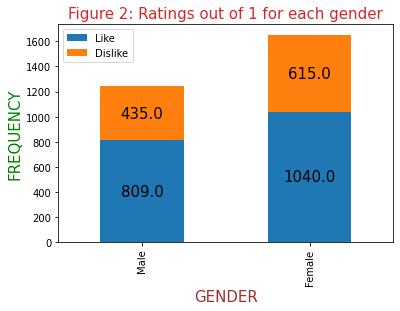

,Like,Dislike,ratio
gender,,,
Male,809,435,0.54
Female,1040,615,0.59


In [17]:
ax = genderRating_df2.plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)
ax.set_xlabel('GENDER',color='brown', fontsize=15)
ax.set_ylabel('FREQUENCY', color='green',fontsize=15)
ax.set_title('Figure 2: Ratings out of 1 for each gender',color=color, fontsize=15)
# Display chart
plt.show()
genderRating_df2

## Figure 2: Ratings given for each gender
Figure 2 is a bar graph represting all rating given by each gender on the x axis, y-axis is the rating given 1/1(blue)(like) 0/1(orange)(dislike).
- Females have given more ratings as compared to males
- Males have a ratio of 0.54 which translates to for every like given there are 0.54 dislikes for males
- Females have a ratio of 0.59 which translates to for every like given there are 0.59 dislikes for females 
- Althought females have higher count of rating, the ratio between males and females are quite similiar which suggest items category and rerview are accounted in a similiar fashion by both genders, when giving a rating.

In [18]:
userRatings = digit_df.groupby(['userId'])['rating_code'].count().reset_index(name='count')
print(userRatings)
print("Lowest userId: ", digit_df.userId.min())
print("Highest userId: ", digit_df.userId.max())
userRatings.describe()

     userId  count
0        46     12
1        75      8
2        76      8
3        92     14
4       119     21
..      ...    ...
284   10420      7
285   10465      8
286   10565      8
287   10728     10
288   10815      7

[289 rows x 2 columns]
Lowest userId:  46
Highest userId:  10815


,userId,count
count,289.000000,289.000000
mean,5478.806228,10.031142
std,3436.565918,3.886729
min,46.000000,6.000000
25%,1735.000000,7.000000
50%,6036.000000,9.000000
75%,8616.000000,11.000000
max,10815.000000,30.000000


In [19]:
digit_df.corr()

,userId,helpfulness,category_code,gender_code,review_code,item_code,rating_code
userId,1.000000,-0.016841,0.015408,0.056183,0.013212,-0.002618,0.010844
helpfulness,-0.016841,1.000000,-0.000189,-0.046627,0.016170,-0.010780,-0.016850
category_code,0.015408,-0.000189,1.000000,-0.017644,0.012047,-0.054699,-0.116312
gender_code,0.056183,-0.046627,-0.017644,1.000000,-0.014422,0.006231,0.022576
review_code,0.013212,0.016170,0.012047,-0.014422,1.000000,0.168119,-0.046935
item_code,-0.002618,-0.010780,-0.054699,0.006231,0.168119,1.000000,0.013629
rating_code,0.010844,-0.016850,-0.116312,0.022576,-0.046935,0.013629,1.000000


## Logistic Regression Model

In [20]:
train, test = train_test_split(digit_df, test_size=0.4, random_state=142)
print(train.shape)
print(test.shape)

(1739, 7)
(1160, 7)


In [21]:
X_train = train[['category_code']]
y_train = train['rating_code']

X_test = test[['category_code']]
y_test = test['rating_code']

print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

print(X_train.head())
print(y_train.head())
print()

X_train = train[['category_code','review_code']]
y_train = train['rating_code']

X_test = test[['category_code','review_code']]
y_test = test['rating_code']

print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

print(X_train.head())
print(y_train.head())

X_train shape (1739, 1)
y_train shape (1739,)
X_test shape (1160, 1)
y_test shape (1160,)
      category_code
662               5
1084              6
1434              1
1649              5
1558              5
662     1
1084    1
1434    1
1649    1
1558    1
Name: rating_code, dtype: int32

X_train shape (1739, 2)
y_train shape (1739,)
X_test shape (1160, 2)
y_test shape (1160,)
      category_code  review_code
662               5          430
1084              6         1021
1434              1         1211
1649              5         1687
1558              5         1581
662     1
1084    1
1434    1
1649    1
1558    1
Name: rating_code, dtype: int32


In [22]:
#Traing the Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

### Evaluation and Accuracy

In [24]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

trainAcc = accuracy_score(y_train, y_hat_train)
testAcc = accuracy_score(y_test, y_hat_test)
Dataset = 'Train', 'Test'
accuracyVal = trainAcc, testAcc

print("Accuracy score on training set: ", trainAcc)
print("Accuracy score on testing set: ", testAcc)

Accuracy score on training set:  0.6313973548016101
Accuracy score on testing set:  0.6405172413793103


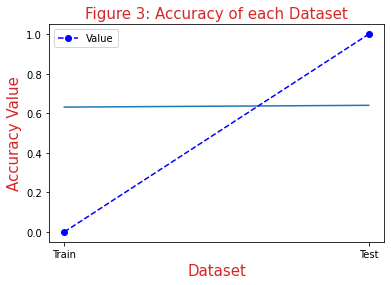

In [25]:
fig, ax3 = plt.subplots()
ax3.plot(Dataset,accuracyVal)
plt.plot(range(2), linestyle='--', marker='o', color='b', label='Value')
ax3.set_xlabel('Dataset',color=color, fontsize=15)
ax3.set_ylabel('Accuracy Value', color=color,fontsize=15)
ax3.set_title('Figure 3: Accuracy of each Dataset',color=color,fontsize=15)
plt.legend()

## Figure 3: Visualistion of the train and test Logistic Model
- Train and test Logistic Model show moderate accuracy of approximately 65%
- Ideal range for machine learning 70 to 90 percent
- Inconsistent data in the dataframe hinders the accuracy our models.
- Accuracy score between train and test are quite close therefore no overfitting of the model required

In [26]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[ 11 402]
 [ 15 732]]


In [27]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[  15  622]
 [  19 1083]]


## Feature Selection

In [28]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [29]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.6405172413793103


In [30]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000


In [31]:
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.6439655172413793
Acc on test set using 2 features:  0.6405172413793103
Acc on test set using 3 features:  0.6405172413793103
Acc on test set using 4 features:  0.6405172413793103
Acc on test set using 5 features:  0.6405172413793103
Acc on test set using 6 features:  0.6405172413793103
Acc on test set using 7 features:  0.6405172413793103
Acc on test set using 8 features:  0.6405172413793103
Acc on test set using 9 features:  0.6405172413793103


In [32]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator,i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features',color=color,fontsize=15)
plt.ylabel('Accuracy score on test set',color=color,fontsize=15)
plt.title('Figure 4: Accuracy of each feature in the dataframe',color=color,fontsize=15)
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

TypeError: __init__() takes 2 positional arguments but 3 were given

## KNN Method

In [33]:
KNN = KNeighborsClassifier(n_neighbors=100)

KNN.fit(X_train, y_train)
print(KNN)

y_expect = y_test
y_pred = KNN.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

KNeighborsClassifier(n_neighbors=100)
              precision    recall  f1-score   support

           0       0.30      0.01      0.01       413
           1       0.64      0.99      0.78       747

    accuracy                           0.64      1160
   macro avg       0.47      0.50      0.40      1160
weighted avg       0.52      0.64      0.51      1160



In the output above show that the k value f1-score is 0.01 for x and y train is 0.01 and for x and y test it is 0.78.

This report consist of an exploration of the ratings within the dataframe, as the rating adopted a new form to express a rating on item, with either a like or dislike were as before its was a rating score out of 5. Females provided more ratings than males however both genders rated more likes for their movies assumed by looking at the ratio. Category has the highest negative correlation with rating, which shows review plays a role in rating of an item, some reviews might influence the users thoughts about an item. Feature Selection demonstrates that all the features have the same accuracy of around 0.64. In conclusion, KNN Classifier calcuate the distance between an x-value in the test dataset was 0.01 and 0.78 which tells us the predictive values are very unaccurate. We may need to have larger dataframe to predict accurate values